Belajar Machine Learning untuk Pemula

Nama = Heri Khariono

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip  \
  -O /tmp/rockpaperscissors.zip

--2021-06-30 02:15:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.77MB/s    in 96s     

2021-06-30 02:17:09 (3.19 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Ekstraksi file zip

In [ ]:
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'


In [ ]:
os.listdir(base_dir)

['rock', 'scissors', 'paper', 'README_rpc-cv-images.txt']

Augmentation image

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    shear_range = 0.2,
    horizontal_flip = True,
    height_shift_range = 2,
    validation_split = 0.4,
    rotation_range = 20,
    fill_mode = 'nearest',
)

val_datagen = ImageDataGenerator(
    rescale = 1./225,
    shear_range = 0.2,
    vertical_flip = True,
    height_shift_range = 2,
    validation_split = 0.4,
    rotation_range = 20,
    fill_mode = 'nearest',
)

train_image = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    class_mode='categorical',
    subset='training',
    shuffle=False,
)

val_image = val_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    class_mode='categorical',
    subset='validation',
    shuffle=True,
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Model sequential

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

Training models

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

model.fit(
    train_image,
    epochs = 15,
    validation_data = val_image,
    validation_steps = 4,
    verbose = 2,
    callbacks=my_callbacks
)

Epoch 1/15
42/42 - 39s - loss: 0.4002 - accuracy: 0.8562 - val_loss: 0.3307 - val_accuracy: 0.8828
Epoch 2/15
42/42 - 39s - loss: 0.3039 - accuracy: 0.8889 - val_loss: 0.2277 - val_accuracy: 0.9219
Epoch 3/15
42/42 - 39s - loss: 0.2362 - accuracy: 0.9155 - val_loss: 0.2772 - val_accuracy: 0.9453
Epoch 4/15
42/42 - 39s - loss: 0.2122 - accuracy: 0.9155 - val_loss: 0.2726 - val_accuracy: 0.9141


Saving example.jpg to example (1).jpg
SCISSORS


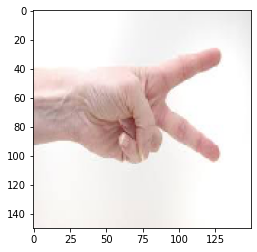

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for img_uploaded in uploaded.keys():
 
  # predicting images
  path = img_uploaded
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  prediction = model.predict(images, batch_size=10)
  
  if prediction[0,0]==1:
    print('SCISSORS')
  elif prediction[0,1]==1:
    print('PAPER')
  else:
    print('ROCK')